# Transmissão de Energia Sem Fio (WPT)

Eletromagnetismo e Ondulatória - Engenharia da Computação - Insper

Dr. Carlos Nehemy Marmo

Grupo:
- Pedro Paulo Camargo 
- Lidia Alves Chagas Domingos  
- Lincoln Rodrigo
- Lucas Oliveira


### Diagrama do modelo eletrodinâmico do circuito WPT


![alt text](projeto-eletromag.png "Alo")


### Matriz a ser resolvida

$$ Z_{eq} = \frac{\frac{1}{j\omega{C}_{2}}R_{C}}{\frac{1}{j\omega{C}_{2}}+R_{C}} = \frac{R_{C}}{j\omega{R}_{C}{C}_{2} +1} $$

$$ \hat{V}_{f} = R_{1}\hat{I}_{1} + j\omega{L}_{1}\hat{I}_{1} + \frac{1}{j\omega{C}_{1}}\hat{I}_{1} - j\omega M\hat{I}_{2} $$

$$ j\omega M\hat{I}_{1} =  j\omega{L}_{2}\hat{I}_{2} + R_{2}\hat{I}_{2} + Z_{eq}\hat{I}_{2}$$


$$\begin{bmatrix} {R}_{1} + j\omega{L}_{1} + \frac{1}{j\omega{C}_{1}} & - j\omega M  \\ - j\omega M & j\omega{L}_{2} + R_{2} + Z_{eq}   \end{bmatrix} \begin{bmatrix} \hat{I}_{1} \\ \hat{I}_{2}  \end{bmatrix} = \begin{bmatrix} \hat{V}_{f} \\ 0  \end{bmatrix}$$

### Modelo Numérico


#### Importando bibliotecas utilizadas no projeto


In [2]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

#### Definindo parâmetros para os cálculos:

Variáveis do Sistema:  $R_C= 100 \Omega$, $R_1=3,32 \Omega$, $R_2= 3,56 \Omega$, $L_1=344 \mu H$, $L_2=360,8 \mu H$, $C_1 = 1 \mu F$, $C_2 = 1 \mu F$ e $V1 = 6,4 V$

In [8]:
# Resistência da bobina do primário (Em Ohm) - Precisou de um ajuste de resistência para bater com o experimental.
R_1 = 1.701*1.95

# Resistência da bobina do secundário (Em Ohm) - Precisou de um ajuste de resistência para bater com o experimental.
R_2= 1.827*1.95

# Indutância do primário (em Henry)
L_1 = 0.3444e-3

# Indutância do secundário (em Henry)
L_2 = 0.3608e-3

# Capacitor em série do primário (em Faraday)
C_1 = 0.1e-6

# Capacitor em paralelo do secundário (em Faraday)
C_2 = C_1

# Tensão de entrada do primário (Em Volts)
V1 = 9.9*(2/np.pi)

# Carga no secundário (em Ohm)
RC = 100

#### Cálculo da frequência de ressonância a partir da fórmula de um conjunto LC

In [9]:
w_ref = 1 / sqrt(((L_1)) * C_1)
f_ref = w_ref / (2*np.pi)
print(f'Frequência de ressonância obtida: {abs(f_ref):.2f} Hz')

Frequência de ressonância obtida: 27119.93 Hz


#### A função "calcula_parametros" recebe o $ \omega $ e k e devolve os valores de $ I_1 , I_2, I_C , V_2 $ 

In [10]:
def calcula_parametros(w,k):
    """
    Aqui temos uma função que recebe a frequência angular e o fator de acoplamento (k)
    e devolve as correntes I1, I2, IC e V2
    """
    M = k*np.sqrt(L_1*L_2)
    XL1 = 0 + w*L_1*1j
    XL2 = 0 + w*L_2*1j
    XC1 = 0 - (1/(w*C_1))*1j
    XC2 = 0 - (1/(w*C_2))*1j
    Z_eq = ( RC* XC2) / ( RC+ XC2)
    XM = 0 + (w*M)*1j
    Z1 = R_1 + XL1 + XC1
    Z2 = XL2 + R_2 + Z_eq
    Z = np.array([
        [Z1, -XM],
        [-XM,  Z2]
    ])
    V = np.array([V1, 0])
    I1,I2 = np.dot(linalg.inv(Z), V)
    V2 = Z_eq * I2
    IC = V2 / RC
    return I1, I2, IC, V2


Em seguida, plota-se o gráfico da corrente $ I_1 , I_2 , I_C $ em função da frequência para visualizar como se comporta a corrente em função da frequência, e assim, achar a frequência mais adequada.

#### Gráficos das Correntes x Frequência


27250


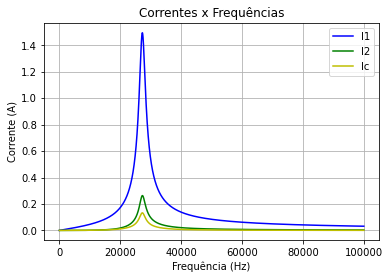

In [11]:
lista_frequencias = np.arange(10,100000,10)
params = [[],[],[],[]]
for f in lista_frequencias:
    w = 2*np.pi*f
    I1,I2,IC,V2 = calcula_parametros(w,0.1)
    params[0].append(abs(I1))
    params[1].append(abs(I2))
    params[2].append(abs(IC))
    params[3].append(abs(V2))

I1max, I2max, ICMAX= max(params[0]), max(params[1]), max(params[2])
indexI1, indexI2 , indexIC= params[0].index(I1max), params[1].index(I2max),params[2].index(ICMAX)
#Descobre a respectiva frequência para corrente máxima
fmax1,fmax2, fmaxc= lista_frequencias[indexI1],lista_frequencias[indexI2],lista_frequencias[indexIC]
print(lista_frequencias[indexIC])
plt.plot(lista_frequencias,np.abs(params[0]),'b',label = ("I1"))
plt.plot(lista_frequencias,np.abs(params[1]),'g',label = ("I2"))
plt.plot(lista_frequencias,np.abs(params[2]),'y',label = ("Ic"))
plt.legend()
plt.title('Correntes x Frequências')
plt.ylabel("Corrente (A)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()



In [13]:
print(f"As frequências obtidas no primário, secundário e na carga foram, respectivamente: {fmax1} Hz, {fmax2} Hz e {fmaxc} Hz")

As frequências obtidas no primário, secundário e na carga foram, respectivamente: 27250 Hz, 27280 Hz e 27250 Hz


A diferença nas frequências ocorrem devido ao fato das bobinas não serem exatamente iguais e com resistências diferentes, porém, ainda sim, dando um valor próximo á frequência de ressonância.

In [14]:
print(f"A frequência ótima encontrada foi : {fmaxc} Hz")

A frequência ótima encontrada foi : 27250 Hz


#### Para observar como a transferência de energia é máxima, plota-se o gráfico de frequência x potência.

In [15]:
def potencia(Veq, Ieq):
    S = (Veq/sqrt(2))*(Ieq/sqrt(2)).conjugate()
    return S
#Função que calcula potência em função de I do resistor e R
def potencia_resistor(Ir,R):
    S =R*(Ir/sqrt(2))*(Ir/sqrt(2)).conjugate()
    return S

In [28]:
# params2 = [[],[],[],[]]
potencia_entrada = []
potencia_saida = []
rendimento = []
tensao = []
for f in lista_frequencias:
    w = 2*np.pi*f
    I1,I2,IC,V2 = calcula_parametros(w,0.1)
    S_entrada = potencia(I1,V1)
    S_saida = potencia(V2,IC)
    n = (S_saida.real/S_entrada.real)*100
    potencia_entrada.append(abs(S_entrada.real))
    potencia_saida.append(abs(S_saida.real))
    rendimento.append(abs(n))
    tensao.append(abs(V2))
#     params2[0].append(abs(S_entrada.real))
#     params2[1].append(abs(S_saida.real))
#     params2[2].append(abs(n))
#     params2[3].append(abs(V2))

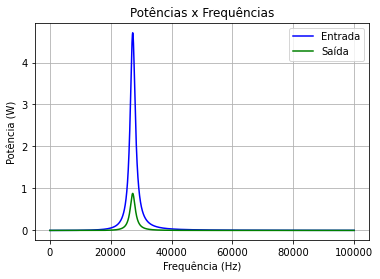

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(lista_frequencias,potencia_entrada,'b',label = ("Entrada"))
# plt.plot(lista_frequencias,params2[0],'b',label = ("Entrada"))

plt.plot(lista_frequencias,potencia_saida,'g',label = ("Saída"))
# plt.plot(lista_frequencias,params2[1],'g',label = ("Saída"))

plt.legend()
plt.title('Potências x Frequências')
plt.ylabel("Potência (W)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()

In [30]:
index = potencia_saida.index(max(potencia_saida))
freq = lista_frequencias[index]
print(f"Variando a frequência, comprova-se que a potência máxima de saída é quando f = {freq} Hz.")

Variando a frequência, comprova-se que a potência máxima de saída é quando f = 27250 Hz.


Além da potência, é muito importante olhar para a eficiência (rendimento) do circuito.

#### Gráfico Eficiência x Frequência


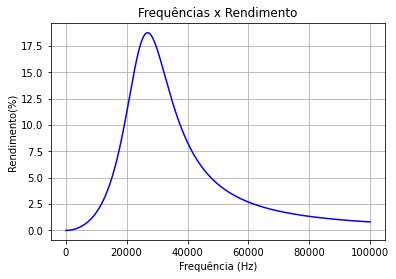

In [31]:
plt.plot(lista_frequencias,rendimento,'b')
plt.title('Frequências x Rendimento')
plt.ylabel("Rendimento(%)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()

#### Gráfico: Tensão na Carga x K (constante de acoplamento)


In [32]:
lista_k = np.arange(0,1,0.01)
lista_v = []
for k in lista_k:
    I1,I2,IC,V2 = calcula_parametros(27250*2*np.pi,k)
    lista_v.append(V2)

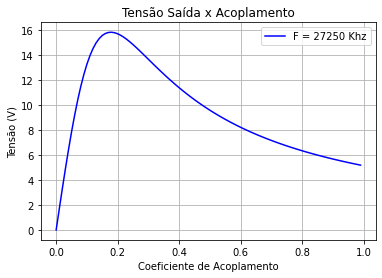

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(lista_k,np.abs(lista_v),'b',label = ("F = 27250 Khz"))
plt.title('Tensão Saída x Acoplamento')
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

Pelo gráfico, é possível perceber uma tensão de saída maior quando o k está entre 0.15 e 0.2, por isso, é esperado uma melhor potência nesse intervalo.

## Comparação com o Real

#### Dados Práticos - Dados que foram medidos no circuito montado.

Foi medido as tensões de acordo com a distância, assim podendo plotar o gráfico Tensão x Distância.

In [34]:
lista_distancias = [2,3.4,4.4,5.4,7.5,8.1,10.2, 13.9,17.4,20.5]
lista_tensoes_p = [10.75,13.75,15,15.8,13.35,12.55,9.15,5.35,3.3,2.3]


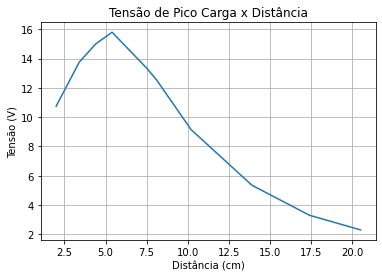

In [35]:
plt.plot(lista_distancias,lista_tensoes_p)
plt.title('Tensão de Pico Carga x Distância')
plt.ylabel("Tensão (V)")
plt.xlabel("Distância (cm)")
plt.grid(True)
plt.show()

Além das tensões, observa-se a tensão na carga.

In [36]:
lista_potencias = []
for v in lista_tensoes_p:
    S = ((v/sqrt(2))**2)/RC 
    lista_potencias.append(S.real)

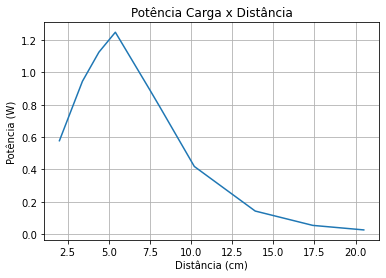

In [37]:
plt.plot(lista_distancias,lista_potencias)
plt.title('Potência Carga x Distância')
plt.ylabel("Potência (W)")
plt.xlabel("Distância (cm)")
plt.grid(True)
plt.show()

Para comparar o modelo real com o teórico, é necessário se ter mais alguns gráficos:

#### Gráficos Comparativos

In [38]:
lista_k = np.arange(0,1,0.01)
lista_saida =  []
lista_potencias = []
for k in lista_k:
    I1,I2,IC,V2 = calcula_parametros(27240*2*np.pi,k)
    lista_saida.append(abs(V2))
    S_saida = potencia(V2,IC)
    lista_potencias.append(S_saida.real)

In [39]:
lista_k_reais = [lista_k[1],lista_k[2],lista_k[3],lista_k[6],lista_k[9],lista_k[10],lista_k[17],lista_k[24],lista_k[30],lista_k[43]]
lista_picos_reais_invertida = lista_tensoes_p[::-1]
print(f"A maior tensão teórica achada no modelo, variando-se o k e com a frequência de 27240 Hz foi de: {max(lista_saida):.2f} V")

A maior tensão teórica achada no modelo, variando-se o k e com a frequência de 27240 Hz foi de: 15.83 V


Comparação entre a tensão de saída no modelo e no experimento em função da constante de acoplamento.

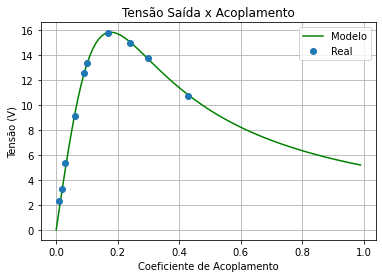

In [40]:
plt.plot(lista_k,np.abs(lista_saida),'g',label = ("Modelo"))
plt.plot(lista_k_reais,lista_picos_reais_invertida,'o',label = ("Real"))
plt.title('Tensão Saída x Acoplamento')
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

Comparação entre a potência no modelo e no experimento em função da constante de acoplamento.

In [41]:
pot_reais = []
for i in lista_picos_reais_invertida:
    pot_reais.append(((i**2/2)/RC).real)

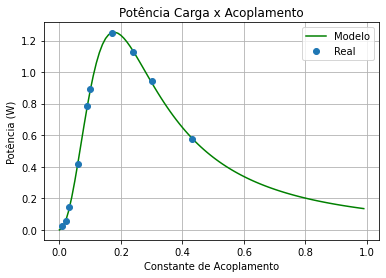

In [42]:
plt.plot(lista_k,lista_potencias,'g',label = ("Modelo"))
plt.plot(lista_k_reais,pot_reais,'o',label = ("Real"))
plt.legend()
plt.title('Potência Carga x Acoplamento')
plt.ylabel("Potência (W)")
plt.xlabel("Constante de Acoplamento")
plt.grid(True)
plt.show()

In [43]:
print(f"Portanto, têm-se que a tensão máxima achada no modelo é de {max(lista_saida):.3f} V e a potência máxima é de {max(lista_potencias):.3f} W, já no experimento, têm-se a tensão máxima de {max(lista_tensoes_p)} V e potência máxima de {max(pot_reais):.3f} W")

Portanto, têm-se que a tensão máxima achada no modelo é de 15.826 V e a potência máxima é de 1.252 W, já no experimento, têm-se a tensão máxima de 15.8 V e potência máxima de 1.248 W


Sabendo que o k tem que ser próximo de 1 quando as bobinas estão muito próximas ou quando tem a ligação com o núcleo de ferro, é possível fazer as seguintes relações:

In [44]:
new_list_k = list(reversed(lista_k_reais))
new_list_k

[0.43, 0.3, 0.24, 0.17, 0.1, 0.09, 0.06, 0.03, 0.02, 0.01]

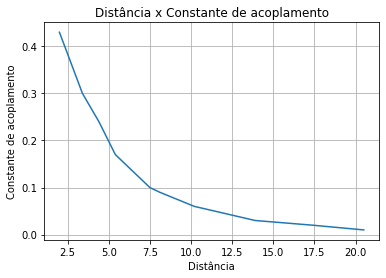

In [45]:
plt.plot(lista_distancias, new_list_k)
plt.title("Distância x Constante de acoplamento")
plt.xlabel("Distância")
plt.ylabel("Constante de acoplamento")
plt.grid(True)
plt.show()

In [46]:
index = lista_distancias.index(5.4)
melhor_k = new_list_k[index]
melhor_k

0.17

Para uma distância de 5.4 cm, que foi onde foi medida a máxima tensão e potência no experimento, têm-se um k de 0.28, que também vai de acordo com o que foi especulado no gráfico mais acima de tensão por acoplamento.

Além disso, é possível fazer mais alguns gráficos conclusivos, para analisar o comportamento de outros valores.

#### Frequência em função do fator de acoplamento

In [48]:
lista_frequencias = np.arange(10,100000,10)
lista_k = np.arange(0.1,1,0.05)
frequencia_otima = []
corrente_lista = []
for k in lista_k:
    corrente_lista = []
    for f in lista_frequencias:
        I1,I2,IC,V2 = calcula_parametros(f*2*np.pi,k)
        corrente_lista.append(abs(I2))
#     print(abs(I2), k)
#     print(k)
    idx_max = corrente_lista.index(max(corrente_lista))
    frequencia_otima.append(lista_frequencias[idx_max])
print(frequencia_otima)


[27280, 27470, 27780, 28280, 29080, 30350, 32040, 33970, 36080, 38440, 41130, 44290, 48140, 53020, 59560, 69060, 84890, 99990]


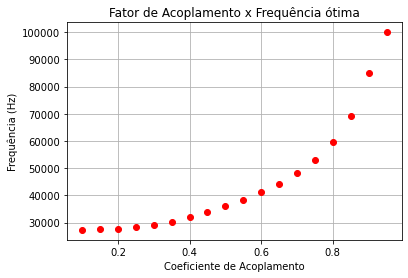

In [49]:
plt.plot(lista_k,frequencia_otima,'ro',)
plt.title('Fator de Acoplamento x Frequência ótima')
plt.ylabel("Frequência (Hz)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

Com o gráfico acima, podemos perceber que quanto maior for o fator de acoplamento, maior será a frequência ótima.

#### O segundo gráfico será da Tensão de Saída x Acomplamento em em função de R1 e R2


In [50]:
lista_resistencia = np.arange(10,40,5)

In [51]:
def calcula_parametros(w,k,R):
    """
    Aqui temos uma função que recebe a frequência angular e o fator de acoplamento (k)
    e devolve as correntes I1, I2, IC e V2
    """
    M = k*np.sqrt(L_1*L_2)
    XL1 = 0 + w*L_1*1j
    XL2 = 0 + w*L_2*1j
    XC1 = 0 - (1/(w*C_1))*1j
    XC2 = 0 - (1/(w*C_2))*1j
    Z_eq = ( RC* XC2) / ( RC+ XC2)
    XM = 0 + (w*M)*1j
    Z1 = R + XL1 + XC1
    Z2 = XL2 + R + Z_eq
    Z = np.array([
        [Z1, -XM],
        [-XM,  Z2]
    ])
    V = np.array([V1, 0])
    I1,I2 = np.dot(linalg.inv(Z), V)
    V2 = Z_eq * I2
    IC = V2 / RC
    return I1, I2, IC, V2

In [52]:
lista_k = np.arange(0,1,0.01)
lista_saidas = []
for r in lista_resistencia:
    lista_v = []
    for k in lista_k:
        I1,I2,IC,V2 = calcula_parametros(27240*2*np.pi,k,r)
        lista_v.append(V2)
    lista_saidas.append(lista_v)

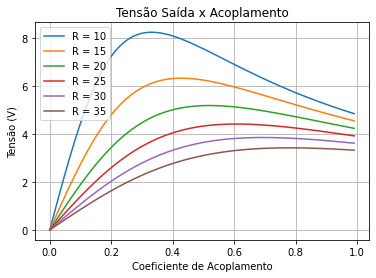

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(0,len(lista_resistencia)):
    plt.plot(lista_k,np.abs(lista_saidas[i]),label = (f"R = {lista_resistencia[i]}"))
plt.title('Tensão Saída x Acoplamento')
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

Com o gráfico acima, é possível perceber que quanto maior é a resistência, menor é a tensão de saída e mais deslocada para direita a onda estará em relação ao coeficiente de acoplamento.

### Conclusão

Pode-se perceber que o experimento está parecido com o simulado, de forma que a tensão máxima no experimento foi praticamente igual a tensão simulada. Entretanto, talvez com mais medições experimentais, seria possível concluir com mais certeza a validade do modelo e assim, se ter um estudo ainda mais preciso.

Link do Funcionamento do Projeto: https://www.youtube.com/watch?v=-aaQGKZ2Qyw